# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-3, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = {'SGD': keras.optimizers.SGD, 
             'Adagrad': keras.optimizers.Adagrad,  
             'RMSprop': keras.optimizers.RMSprop, 
             'Adam': keras.optimizers.Adam}

In [12]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opt_name, optimizer in OPTIMIZER.items():
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer(lr=lr))

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "opt-%s-lr-%.6f" % (opt_name, lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.2709 - acc: 0.1530 - val_loss: 2.2217 - val_acc: 0.1869
Epoch 2/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.5137 - acc: 0.1061 - val_loss: 2.4957 - val_acc: 0.1029
Epoch 2/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.4755 - acc: 0.1060 - val_loss: 2.4610 - val_acc: 0.1025
Epoch 3/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.4446 - acc: 0.1062 - val_loss: 2.4330 - val_acc: 0.1029
Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.4196 - acc: 0.1065 - val_loss: 2.4103 - val_acc: 0.1023
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.3992 - acc: 0.1077 - val_loss: 2.3917 - val_acc: 0.1032
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3826 - acc: 0.1082 - val_loss: 2.3765 - val_acc: 0.1046
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.3688 - acc: 0.1087 - val_loss: 2.3638 - 

50000/50000 [==============================] - 7s 145us/step - loss: 1.8351 - acc: 0.3542 - val_loss: 1.8359 - val_acc: 0.3376
Epoch 3/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7672 - acc: 0.3821 - val_loss: 1.7919 - val_acc: 0.3517
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7243 - acc: 0.3996 - val_loss: 1.7470 - val_acc: 0.3864
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6932 - acc: 0.4096 - val_loss: 1.6967 - val_acc: 0.4005
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6652 - acc: 0.4199 - val_loss: 1.6648 - val_acc: 0.4170
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6430 - acc: 0.4299 - val_loss: 1.6523 - val_acc: 0.4267
Epoch 8/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6239 - acc: 0.4356 - val_loss: 1.6301 - val_acc: 0.4309
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 151us/step - loss: 2.1389 - acc: 0.2343 - val_loss: 2.1317 - val_acc: 0.2359
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.1234 - acc: 0.2401 - val_loss: 2.1175 - val_acc: 0.2408
Epoch 6/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.1105 - acc: 0.2447 - val_loss: 2.1056 - val_acc: 0.2452
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.0996 - acc: 0.2479 - val_loss: 2.0955 - val_acc: 0.2496
Epoch 8/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.0904 - acc: 0.2524 - val_loss: 2.0869 - val_acc: 0.2524
Epoch 9/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.0824 - acc: 0.2553 - val_loss: 2.0795 - val_acc: 0.2562
Epoch 10/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.0755 - acc: 0.2585 - val_loss: 2.0729 - val_acc: 0.2585
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 8s 160us/step - loss: 1.6133 - acc: 0.4249 - val_loss: 1.6336 - val_acc: 0.4171
Epoch 7/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.5792 - acc: 0.4386 - val_loss: 1.6842 - val_acc: 0.3961
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5505 - acc: 0.4500 - val_loss: 1.7269 - val_acc: 0.3841
Epoch 9/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.5168 - acc: 0.4615 - val_loss: 1.6862 - val_acc: 0.4056
Epoch 10/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.4926 - acc: 0.4683 - val_loss: 1.5810 - val_acc: 0.4321
Epoch 11/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.4643 - acc: 0.4802 - val_loss: 1.5594 - val_acc: 0.4514
Epoch 12/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.4444 - acc: 0.4869 - val_loss: 1.6188 - val_acc: 0.4361
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 8s 158us/step - loss: 1.7408 - acc: 0.3985 - val_loss: 1.7453 - val_acc: 0.3891
Epoch 9/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7249 - acc: 0.4039 - val_loss: 1.7217 - val_acc: 0.4047
Epoch 10/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7104 - acc: 0.4088 - val_loss: 1.7172 - val_acc: 0.4058
Epoch 11/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6968 - acc: 0.4134 - val_loss: 1.7006 - val_acc: 0.4120
Epoch 12/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6847 - acc: 0.4168 - val_loss: 1.6968 - val_acc: 0.4119
Epoch 13/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6733 - acc: 0.4224 - val_loss: 1.6814 - val_acc: 0.4221
Epoch 14/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6623 - acc: 0.4253 - val_loss: 1.6696 - val_acc: 0.4266
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 9s 177us/step - loss: 1.4130 - acc: 0.4996 - val_loss: 1.4901 - val_acc: 0.4843
Epoch 11/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.3963 - acc: 0.5064 - val_loss: 1.4724 - val_acc: 0.4754
Epoch 12/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.3787 - acc: 0.5106 - val_loss: 1.4945 - val_acc: 0.4659
Epoch 13/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.3632 - acc: 0.5161 - val_loss: 1.4399 - val_acc: 0.4893
Epoch 14/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.3405 - acc: 0.5260 - val_loss: 1.4368 - val_acc: 0.4980
Epoch 15/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.3183 - acc: 0.5329 - val_loss: 1.4039 - val_acc: 0.5016
Epoch 16/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.3068 - acc: 0.5362 - val_loss: 1.4136 - val_acc: 0.4968
Epoch 17/50
50000/50000 [==============

50000/50000 [==============================] - 9s 181us/step - loss: 1.6737 - acc: 0.4249 - val_loss: 1.6819 - val_acc: 0.4193
Epoch 13/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.6588 - acc: 0.4292 - val_loss: 1.6658 - val_acc: 0.4202
Epoch 14/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6463 - acc: 0.4343 - val_loss: 1.6519 - val_acc: 0.4282
Epoch 15/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6352 - acc: 0.4386 - val_loss: 1.6417 - val_acc: 0.4288
Epoch 16/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.6244 - acc: 0.4415 - val_loss: 1.6315 - val_acc: 0.4333
Epoch 17/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6141 - acc: 0.4454 - val_loss: 1.6226 - val_acc: 0.4389
Epoch 18/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6052 - acc: 0.4495 - val_loss: 1.6171 - val_acc: 0.4386
Epoch 19/50
50000/50000 [==============

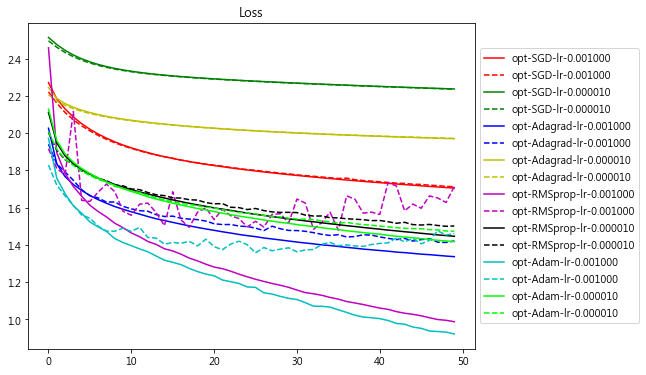

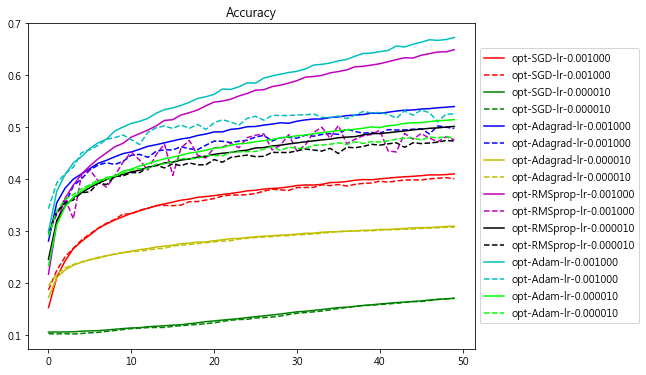

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c", "lime"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()